# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `Clustering`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q1.ipynb`.

In [1]:
import nltk
nltk.download('punkt')    
# if u r facing issues while importing nltk, please uncomment above line and run
import re
import numpy as np
import sklearn
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /home/raghava/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:

from sentence_transformers import SentenceTransformer


# Dataset



*   Try to explore the dataset and first understand
*   Steps while processing the dataset:

1.   Load the dataset
>> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: train and test. Here, we only use train part of the dataset as we don't need any training.

2.   pre-processing of the dataset
>>   A set of basic pre-processing steps are given below, if you can do it better, it is appreciable
3.   Trying to obtain the embeddings for the text. 
>> Here, we used bert model to obtain the embeddings, if you want to use anyother sentence/word embeddings (ELMo,universal sentence encoder, or other bert models) you can use it, but not mandatorily change it)

PS: You need not completely understand how bert works. If you are interested, few links will be mentioned below.

In [3]:
# loading of dataset

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

# print(list(newsgroups_train))
#['data', 'filenames', 'target_names', 'target', 'DESCR']
# all we require for our task is data and target. 
#target_names describe the different groups present (which are 20) all over the dataset

# print(list(newsgroups_train.target_names))



In [4]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [5]:
#preprocessing of sentences and the article

def remove_punct(text):
  text = re.sub('[^a-zA-Z0-9 ]+','', text)
  return text

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

def remove_tag(text):   
  text=' '.join(text)
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'', text)

def pre_process_sentence(sentence):
  sentence = sentence.lower()
  sentence = remove_punct(remove_urls(sentence))
  return sentence

def pre_process_article(article):
  article = str(article).replace("\n", '')
  article = sent_tokenize(article)
  sentences = []
  for each in article:
    if len(each.split(":")) > 1:
      continue
    sentences.append(pre_process_sentence(each))
  return sentences



In [6]:

def get_review_embedding(article):
  sentences = pre_process_article(article)

  #here review(input) has to be a list of sentences
  #use suitable embeddings to get an embedding for the whole review
  #usage of sentence embeddings is recommended

  sentence_embeddings = bert_model.encode(sentences)

  # take average of all sentence embeddings to obtain a review embedding 
  review_embedding = np.zeros(768)
  for each in sentence_embeddings:
    review_embedding = np.add(np.array(each), review_embedding)

  return review_embedding




In [8]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)


In [ ]:
# data visualization 

# Try to visualise the points from all the domains and try to visualise them 
# hint: you can use PCA 

import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt




# K_Means Algorithm


In [9]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, max_iter=2, random_state = 0,n_init = 30)
km.fit(vectors)

print(km.labels_)

[1 0 1 ... 0 0 0]


In [ ]:
#code for visualisation of clusters


# Elbow method



*   Try to understand how elbow method works
*   Plot the graph between average distance and the number of clusters
*   Use elbow method to find the optimal number of clusters, 







1
--------------------------------------
2
--------------------------------------
3
--------------------------------------
4
--------------------------------------
5
--------------------------------------
6
--------------------------------------
7
--------------------------------------
8
--------------------------------------
9
--------------------------------------
10
--------------------------------------
11
--------------------------------------
12
--------------------------------------
13
--------------------------------------
14
--------------------------------------
15
--------------------------------------
16
--------------------------------------
17
--------------------------------------
18
--------------------------------------
19
--------------------------------------


[10768.855488181387,
 10665.701350666075,
 10645.606766364353,
 10634.52027466029,
 10621.669271962992,
 10603.873499845462,
 10596.88936051406,
 10589.033989826823,
 10583.298929965327,
 10578.507837810626,
 10560.797194414485,
 10549.143681634801,
 10549.8647327662,
 10538.934963852873,
 10530.581247478129,
 10520.152675609286,
 10505.583579413296,
 10504.535210135584,
 10493.536790708695]

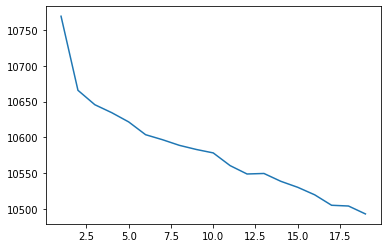

In [12]:
import matplotlib.pyplot as plt

def elbow(X_train, start, end):
  costs = []
  x_cordinate = []
  for i in range(start, end):
      print(i)
      kmeans = KMeans(i, max_iter=2,n_init=30, random_state=0)
      kmeans.fit(X_train)
      costs.append(kmeans.inertia_)
      x_cordinate.append(i)
      print("--------------------------------------")
  plt.plot(x_cordinate,costs)
  return costs


elbow(vectors,1,20)

  


In [2]:
print("optimal clusters by observing oboce graph is 2")

optimal clusters by observing oboce graph is 2


# Silhouette Method


*   Compute silhouette score varying the K number of clusters

*   Plot the graph between silhoutte score and number of clusters 

*   Find the optimal number of clusters using silhouette method




> Report the optimal number of clusters you obtained from above two methods (elbow and silhouette)




In [13]:
from sklearn import metrics

In [18]:
def silhotte(X,start,end):
    value = []
    x_cordinate = []
    for i in range(start,end):
        kmeans = KMeans(n_clusters=i,max_iter=2,n_init=30, random_state=0)
        kmeans.fit(X)
        labels = kmeans.labels_
        score = metrics.silhouette_score(X, labels, metric='euclidean')
        value.append(score)
        x_cordinate.append(i)
    plt.plot(x_cordinate,value)
    return value

  


[0.0077520420003614485,
 0.0017658141597761924,
 -0.0008865083987693781,
 -0.00201837065914185,
 -0.00012751614124158526,
 -0.00012371909894264062,
 -0.004541027381017418,
 -0.00484943629335524]

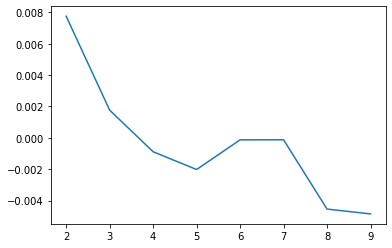

In [20]:
silhotte(vectors,2,10)

In [1]:
print("optimal clusters from the silhotte score is 2")

optimal clusters from the silhotte score is 2


# Agglomerative clustering

In [ ]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import AgglomerativeClustering

def AgglomerativeClustering():
  clustering = AgglomerativeClustering().fit(vectors)
  clustering.labels_




In [ ]:
#code for visualisation of clusters





# Dendogram


*   Try to understand the difference between agglomerative clustering and hierarchical clustering
*   Plot dendograms for both kinds of clustering
*   Find the optimal number of clusters with the help of Dendogram



In [ ]:
# code to write dendogram






# useful links to understand BERT

*  https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270#:~:text=How%20BERT%20works,%2Dwords)%20in%20a%20text.&text=As%20opposed%20to%20directional%20models,sequence%20of%20words%20at%20once.


